In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import statistics as sc
import seaborn as sns
from statsmodels.formula.api import ols 
from sklearn.model_selection import train_test_split

# import all needed library 
Also import the given data using pandas and make a deep copy for your work

In [168]:
dataframe=pd.read_excel(r"C:\\Users\\user\\Desktop\\mavoix_ml_sample_dataset.xlsx")


In [169]:
df=copy.deepcopy(dataframe)

In [170]:
df.shape

(392, 23)

Now find the all information given in the data and filter the data like as given below

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 23 columns):
Application_ID                392 non-null object
Current City                  392 non-null object
Python (out of 3)             392 non-null int64
R Programming (out of 3)      392 non-null int64
Deep Learning (out of 3)      392 non-null int64
PHP (out of 3)                392 non-null int64
MySQL (out of 3)              392 non-null int64
HTML (out of 3)               392 non-null int64
CSS (out of 3)                392 non-null int64
JavaScript (out of 3)         392 non-null int64
AJAX (out of 3)               392 non-null int64
Bootstrap (out of 3)          392 non-null int64
MongoDB (out of 3)            392 non-null int64
Node.js (out of 3)            392 non-null int64
ReactJS (out of 3)            392 non-null int64
Other skills                  392 non-null object
Degree                        386 non-null object
Stream                        392 non-null object
Current 

In [172]:
#df.describe()

In [173]:
df.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80


Here in the some column of data formate diffrent is diffent so we make it in a single formate.

In [174]:
df[["Performance_PG1","Performance_PG2"]]=df.Performance_PG.str.split("/",expand = True)
df[["Performance_UG1","Performance_UG2"]]=df.Performance_UG.str.split("/",expand = True)
df[["Performance_121","Performance_122"]]=df.Performance_12.str.split("/",expand = True)
df[["Performance_101","Performance_102"]]=df.Performance_10.str.split("/",expand = True)

In [175]:
df["Performance_PG1"].fillna(1,inplace=True)
df["Performance_PG2"].fillna(1,inplace=True)
df["Performance_UG1"].fillna(1,inplace=True)
df["Performance_UG2"].fillna(1,inplace=True)
df["Performance_121"].fillna(1,inplace=True)
df["Performance_122"].fillna(1,inplace=True)
df["Performance_101"].fillna(1,inplace=True)
df["Performance_102"].fillna(1,inplace=True)

Here we fill na value by 1 fro further next calculation
And we make make data in a single formate

In [176]:
df["Performance_PG"] = df["Performance_PG1"].astype(float)/df["Performance_PG2"].astype(float)
df["Performance_UG"] = df["Performance_UG1"].astype(float)/df["Performance_UG2"].astype(float)
df["Performance_12"] = df["Performance_121"].astype(float)/df["Performance_122"].astype(float)
df["Performance_10"] = df["Performance_101"].astype(float)/df["Performance_102"].astype(float)

In [177]:
df.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Performance_12,Performance_10,Performance_PG1,Performance_PG2,Performance_UG1,Performance_UG2,Performance_121,Performance_122,Performance_101,Performance_102
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,1.0,1.0,1,1,1,1,1,1,1,1
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,1.0,1.0,1,1,85.50,100,92.20,92.20,96.60,96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,1.0,1.0,7.91,10,70.00,100,64.83,64.83,77.60,77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,1.0,1.0,1,1,6.86,10,76.00,76.00,84.32,84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,1.0,1.0,1,1,6.38,10,65.20,65.20,68.80,68.80


In [178]:
df.drop(df.iloc[:, 23:], inplace = True, axis = 1)

Delete all the unwanted columns form the data and repalce all the nan value by mean of the respected column here we use mean beacuse here mean is good reprsentative of missing value for this columns than medain.

In [179]:
df.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,1.000,1.000,1.0,1.0
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,1.000,0.855,1.0,1.0
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,0.791,0.700,1.0,1.0
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,1.000,0.686,1.0,1.0
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,1.000,0.638,1.0,1.0


In [180]:
df["Performance_PG"].replace(1,sc.mean(df["Performance_PG"]),inplace=True)
df["Performance_UG"].replace(1,sc.mean(df["Performance_UG"]),inplace=True)
df["Performance_12"].replace(1,sc.mean(df["Performance_12"]),inplace=True)
df["Performance_10"].replace(1,sc.mean(df["Performance_10"]),inplace=True)
df["Performance_PG"]=df["Performance_PG"]*100
df["Performance_UG"]=df["Performance_UG"]*100
df["Performance_12"]=df["Performance_12"]*100
df["Performance_10"]=df["Performance_10"]*100

Here we multiply each of df["Performance_PG"],df["Performance_UG"],df["Performance_12"]& df["Performance_10"] beacuse we have to this data in percentage 

In [181]:
df.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,93.267267,74.769253,100.0,100.0
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,93.267267,85.500000,100.0,100.0
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,79.100000,70.000000,100.0,100.0
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,93.267267,68.600000,100.0,100.0
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,93.267267,63.800000,100.0,100.0


statistical summary of data after filteration

In [182]:
df.describe()

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.0,392.0
mean,1.375000,0.566327,0.461735,0.612245,0.403061,1.346939,1.045918,0.770408,0.015306,0.265306,0.035714,0.086735,0.178571,2018.867347,88.269243,70.907404,100.0,100.0
std,0.975237,0.905052,0.842336,0.911789,0.837602,1.071386,1.022976,0.966626,0.122924,0.715928,0.255377,0.401567,0.499360,2.280296,10.808772,11.928590,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000,5.190000,7.500000,100.0,100.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.750000,92.964286,65.000000,100.0,100.0
50%,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,93.267267,73.250000,100.0,100.0
75%,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,93.267267,76.725000,100.0,100.0
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2023.000000,94.300000,95.000000,100.0,100.0


In [183]:
df["Degree"].value_counts()

Bachelor of Technology (B.Tech)                          110
Bachelor of Engineering (B.E)                             84
Master of Computer Applications (MCA)                     70
B.Tech (Hons.)                                            25
Master of Technology (M.Tech)                             19
Master of Science (M.Sc)                                  14
Bachelor of Computer Applications (BCA)                   10
Post Graduate Programme (PGP)                              8
*                                                          6
Integrated M.Sc.                                           5
Bachelor of Science (B.Sc)                                 5
PG Diploma in Data Science                                 5
Post Graduate Diploma in Management (P.G.D.M.)             2
Bachelor of Commerce (B.Com)                               2
Integrated B.Tech                                          2
MBA                                                        2
Integrated B.Tech & M.Te

In [184]:
df["Other skills"].replace("*",sc.mode(df["Other skills"]),inplace=True)
df["Degree"].replace("*",sc.mode(df["Degree"]),inplace=True)
df["Stream"].replace("*",sc.mode(df["Stream"]),inplace=True)
df["Stream"].replace("cs","Computer  Science",inplace=True)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 23 columns):
Application_ID                392 non-null object
Current City                  392 non-null object
Python (out of 3)             392 non-null int64
R Programming (out of 3)      392 non-null int64
Deep Learning (out of 3)      392 non-null int64
PHP (out of 3)                392 non-null int64
MySQL (out of 3)              392 non-null int64
HTML (out of 3)               392 non-null int64
CSS (out of 3)                392 non-null int64
JavaScript (out of 3)         392 non-null int64
AJAX (out of 3)               392 non-null int64
Bootstrap (out of 3)          392 non-null int64
MongoDB (out of 3)            392 non-null int64
Node.js (out of 3)            392 non-null int64
ReactJS (out of 3)            392 non-null int64
Other skills                  392 non-null object
Degree                        386 non-null object
Stream                        392 non-null object
Current 

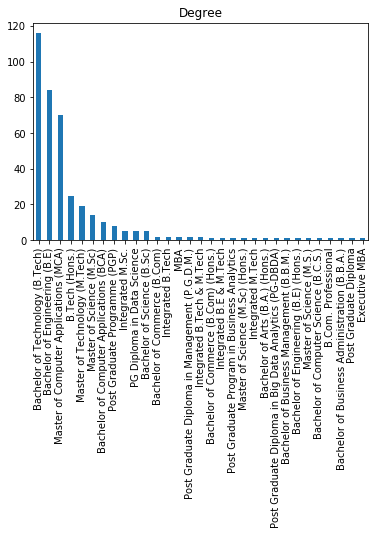

In [186]:
df["Degree"].value_counts().plot(kind="bar",title = "Degree")

From the graph we say that the most of studnt having degree Bachleor of Technology (B.Tech) and very few students from Executive MBA, Post Graduate Diploma...etc.

In [187]:
df["Stream"].value_counts()

Computer  Science                               86
Electronics and Communication                   46
Computer Science & Engineering                  45
Computer Application                            35
Information Technology                          20
                                                ..
Information Science & Engineering                1
Engineering Physics                              1
Business Analytics And Business Intelligence     1
Computer  Science And Engineering                1
Commerce With Maths                              1
Name: Stream, Length: 77, dtype: int64

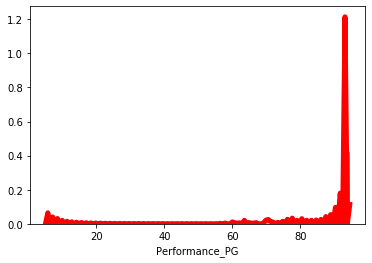

In [188]:
sns.distplot(df["Performance_PG"], color = "red",hist_kws={"edgecolor": "Black"},kde_kws={"linewidth":5})

Using the above bar chart we conculd the score of the studwnts of Performance_PG are above 95%

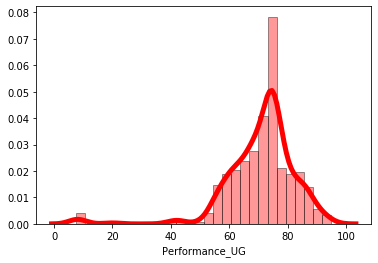

In [189]:
sns.distplot(df["Performance_UG"], color = "red",hist_kws={"edgecolor": "Black"},kde_kws={"linewidth":5})

Here score of the Performance_UG students is lies between 50% to 90% therefore we say that the students performance is on an average.

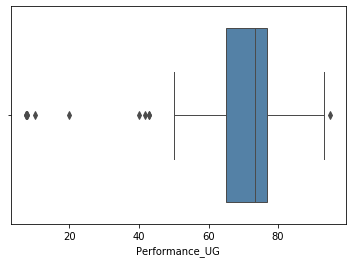

In [190]:
sns.boxplot(df["Performance_UG"],color = "steelblue",linewidth = 1)

using the above dox plot we say that veary few students whos score is below 45% and only one student whos core is above 95% therefore most of students are average students.

In [193]:
df.drop(["Application_ID","Degree","Stream","Other skills"],axis=1,inplace=True)

In [194]:
x=df[df.columns[1:14]]

In [195]:
#x=df.drop(["Application_ID","Current City","Other skills","Degree","Stream","Current Year Of Graduation","Performance_PG","Performance_UG","Performance_12","Performance_10"], inplace = True, axis = 1)

In [196]:
y=df["Performance_PG"]


In [197]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [198]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
Regressor = DecisionTreeRegressor()
a = Regressor.fit(x_train,y_train)

In [199]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
features = ["Python (out of 3)","R Programming (out of 3)","Deep Learning (out of 3)","PHP (out of 3)","MySQL (out of 3)","HTML (out of 3)","CSS (out of 3)","JavaScript (out of 3)","AJAX (out of 3)","Bootstrap (out of 3)","MongoDB (out of 3)","Node.js (out of 3)","ReactJS (out of 3)"]

In [200]:
dot_data = StringIO()  
export_graphviz(Regressor, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

Thank you sir, I try to give my best wthin given time period.
Hope you will be give me chance to explore and learn new knowladge of Data Scientist / Data Analyst in our company. 

# Thank You..!!